# Ranveer Sahu (ES21BTECH11025) # assignment 1

Q1. Redo figure 3.5 in astroml book https://www.astroml.org/book_figures/
chapter3/fig_flux_errors.html with 5%, 10% and 20% flux error. Com-
ment on whether the magnitude distribution is assymetric in all the three
cases.

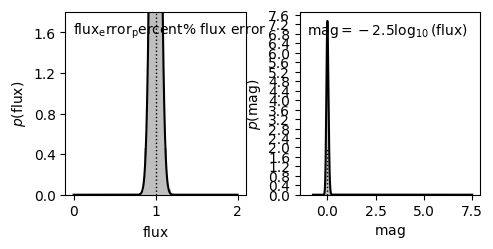

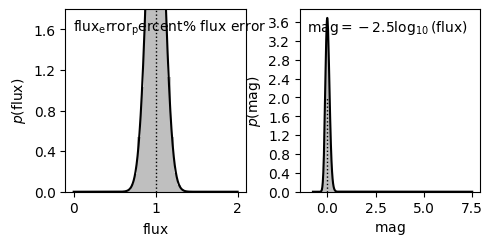

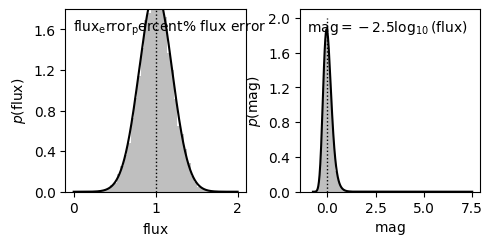

In [111]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

def FluxError(flux_error_percent):
  np.random.seed(1)
  dist = norm(1, flux_error_percent/100)
  flux = dist.rvs(10000)
  flux_fit = np.linspace(0.001, 2, 1000)
  pdf_flux_fit = dist.pdf(flux_fit)

# transform this distribution into magnitude space
  mag = -2.5 * np.log10(flux)
  mag_fit = -2.5 * np.log10(flux_fit)
  pdf_mag_fit = pdf_flux_fit.copy()
  pdf_mag_fit[1:] /= abs(mag_fit[1:] - mag_fit[:-1])
  pdf_mag_fit /= np.dot(pdf_mag_fit[1:], abs(mag_fit[1:] - mag_fit[:-1]))

#------------------------------------------------------------
  # Plot the result
  fig = plt.figure(figsize=(5, 2.5))
  fig.subplots_adjust(bottom=0.17, top=0.9,
                      left=0.12, right=0.95, wspace=0.3)

  # first plot the flux distribution
  ax = fig.add_subplot(121)
  ax.hist(flux, bins=np.linspace(0, 2, 50),
          histtype='stepfilled', fc='gray', alpha=0.5, density=True)
  ax.plot(flux_fit, pdf_flux_fit, '-k')
  ax.plot([1, 1], [0, 2], ':k', lw=1)
  ax.set_xlim(-0.1, 2.1)
  ax.set_ylim(0, 1.8)

  ax.set_xlabel(r'${\rm flux}$')
  ax.set_ylabel(r'$p({\rm flux})$')
  ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
  ax.text(0.04, 0.95, r'${\rm flux_error_percent\%\ flux\ error}$',
          ha='left', va='top', transform=ax.transAxes)

  # next plot the magnitude distribution
  ax = fig.add_subplot(122)
  ax.hist(mag, bins=np.linspace(-1, 2, 50),
          histtype='stepfilled', fc='gray', alpha=0.5, density=True)
  ax.plot(mag_fit, pdf_mag_fit, '-k')
  ax.plot([0, 0], [0, 2], ':k', lw=1)

  ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
  ax.text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$',
          ha='left', va='top', transform=ax.transAxes)

  ax.set_xlabel(r'${\rm mag}$')
  ax.set_ylabel(r'$p({\rm mag})$')

  plt.show()


flux_errors = [5, 10, 20] # flux array with given error which we have to estimate by using for loop
for i in flux_errors:
    FluxError(i)
    plt.show()


Q2. Create 1000 draws from a normal distribution of mean of 1.5 and standard
deviation of 0.5. Plot the pdf. Calculate the sample mean, variance,
skewness, kurtosis as well as standard deviation using MAD and σG of
these samples.


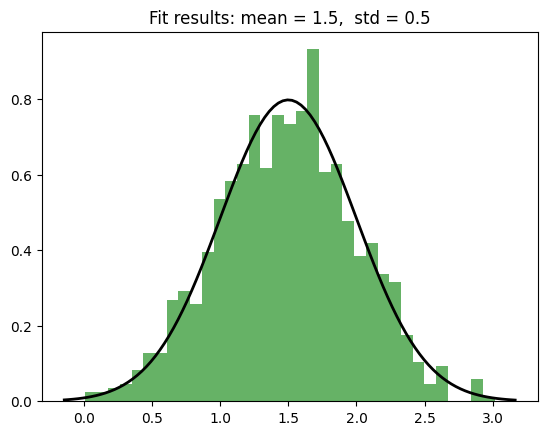

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# point 1: sample data generators using normal distributions
samples = np.random.normal(1.5, 0.5, 1000)

# point 2: find and plot pdf and hist
plt.hist(samples, bins=35, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 1.5, 0.5)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mean = 1.5,  std = 0.5')
plt.show()

# point  3: Calculate sample statistics using inbuild functions mean,var,skewness,kurtosis,mad and sigma_g
nmean = np.mean(samples)
nvar = np.var(samples)
skness = skew(samples)
kurtosis = kurtosis(samples)
mad = np.mean(np.abs(samples - np.mean(samples)))
sigma_g = 1.4826 * np.median(np.abs(samples - np.median(samples)))


In [57]:
# point 4: prints all statisticals results of sample data
print(f"Sample Mean = {nmean}" )
print(f"Sample Variance = {nvar}" )
print(f"Sample Skewness = {skness}" )
print(f"Sample Kurtosis = {kurtosis}" )
print(f"Std_deviation (MAD): = {mad}")
print(f"Std_deviation (σG) = {sigma_g}" )

Sample Mean = 1.4885568848738844
Sample Variance = 0.25383515561832154
Sample Skewness = -0.015364832098242048
Sample Kurtosis = -0.16556819623736896
Std_deviation (MAD): = 0.4052164122077202
Std_deviation (σG) = 0.5004938334229624


Q3. Plot a Cauchy distribution with μ=0 and γ=1.5 superposed on the top of
a Gaussian distribution with μ=0 and σ=1.5. Use two different line styles
to distinguish between the Gaussan and Cauchy distribution on the plot
and also indicate these in the legends.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

#  point 1: Generate random samples of both distributions
g_dist = stats.norm(0,1.5)
c_dist = stats.cauchy(0, 1.5)

x = np.linspace(-6, 6, 1000)


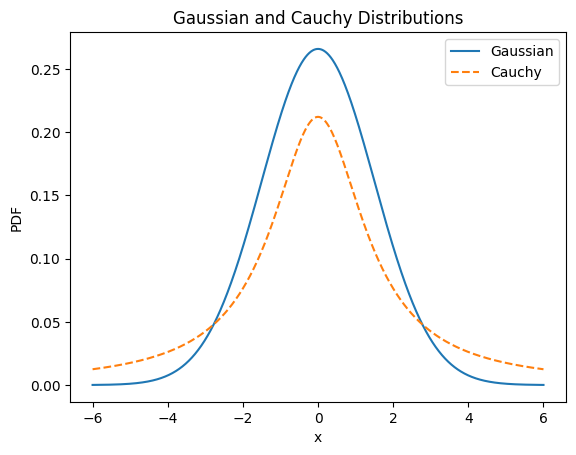

In [59]:
# point 2:  plot pdf of Gaussian and cauchy distributions
gaus_pdf = g_dist.pdf(x)
cauchy_pdf = c_dist.pdf(x)

#plot gaussian nd cauchy in single graph
plt.plot(x, gaus_pdf, linestyle='solid', label='Gaussian')
plt.plot(x, cauchy_pdf, linestyle='dashed', label='Cauchy')
plt.title('Gaussian and Cauchy Distributions')
plt.xlabel('x')
plt.ylabel('PDF')

plt.legend()
plt.show()


Q4. Plot Poisson distribution with mean of 5, superposed on top of a Gaussian
distribution with mean of 5 and standard deviation of square root of 5.
Use two different line styles for the two distributions and make sure the
plot contains legends for both of them.

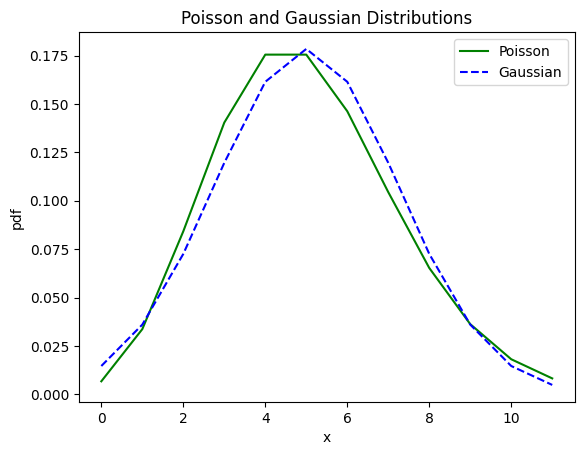

In [83]:
from scipy.stats import poisson as ps, norm

x = np.arange(0, 12)


ps_pmf = ps.pmf(x, 5)
gs_pdf = norm.pdf(x, loc=5, scale=np.sqrt(5))


plt.plot(x, ps_pmf, label='Poisson',color='green',linestyle='solid')
plt.plot(x, gs_pdf, label='Gaussian',color='blue', linestyle='dashed')

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Poisson and Gaussian Distributions')
plt.legend()
plt.show()


Q5 The following were the measurements of mean lifetime of K meson (as of
1990) (in units of 10−10 s) :
 0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958±
 0.00045. Calculate the weighted mean lifetime and uncertainty of the
 mean.

In [89]:
x=[ 0.8920, 0.881, 0.8913, 0.9837,0.8958]
delta_change=[0.00044,0.009,0.00032,0.00048,0.00045]

# intially weight mean and uncertainity of mean =0

p=0
q=0
for i in range(len(x)):
    p+=(x[i]/delta_change[i]**2)
    q+=(1/delta_change[i]**2)

print("weighted mean: ",p/q)
print("uncertainity of the mean ",np.sqrt(1/q))

weighted mean:  0.9089185199574897
uncertainity of the mean  0.00020318737026848627


Q6. Download the eccentricity distribution of exoplanets from the exoplanet
catalog http://exoplanet.eu/catalog/. Look for the column titled e,
which denotes the eccentricity. Draw the histogram of this distribution.
Then redraw the same histogram after Gaussianizing the distribution using

Box-transformation either using scipy.stats.boxcox or from first prin-
ciples using the equations shown in class or in arXiv:1508.00931. Note

that exoplanets without eccentricity data can be ignored.

In [98]:
import pandas as pd
df=pd.read_csv('exoplanet.csv')

In [99]:
y=df['eccentricity']
y.dropna(inplace=True)

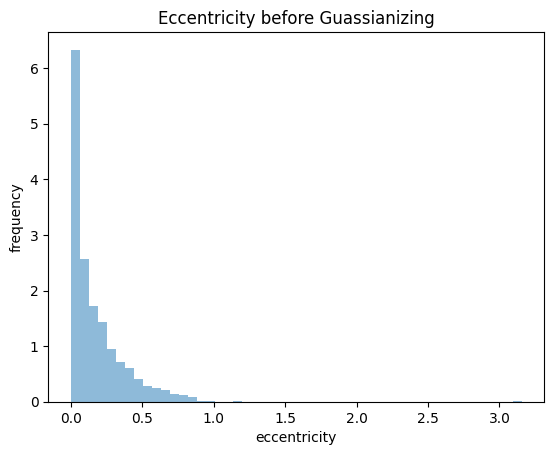

In [100]:
plt.hist(y,bins=50,histtype='stepfilled',alpha=0.5,density=True)
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.title('Eccentricity before Guassianizing')
plt.show()

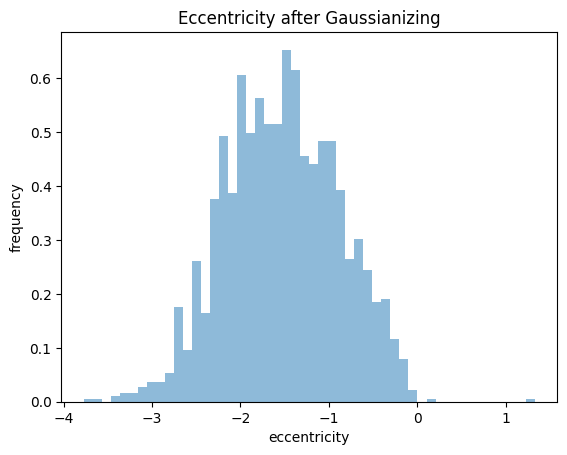

In [101]:
y_1=[i for i in y if i>0]
updated_data,lambda_value= stats.boxcox(y_1)
#plotting the histogram of eccentricity after Gaussianizing
plt.hist(updated_data,bins=50,histtype='stepfilled',alpha=0.5,density=True)
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.title('Eccentricity after Gaussianizing')
plt.show()